# Praktikum 2
## vorbereitende Aufgaben - Aufgabe 2
### 1.


In [2]:
# import libraries
import pandas as pd
import numpy as np
import scipy.signal as sci
import matplotlib.pyplot as plt
import Lab2Functions as ekg

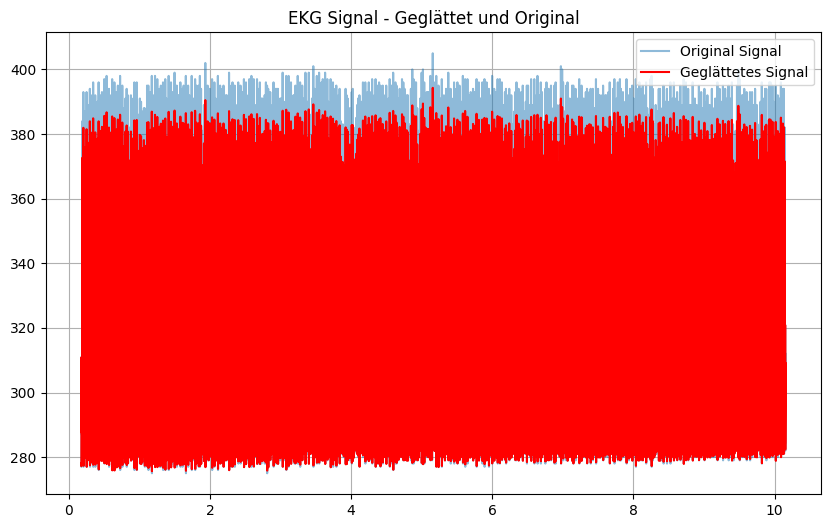

In [3]:
df = pd.read_csv('lab2code1_Ruhe_Carina.csv', sep = ';')
#df2 = pd.read_csv('lab2code1_Ruhe_Pauline.csv', sep = ';')
#df3 = pd.read_csv('lab2code1_Ruhe_Carina.csv', sep = ';')
time_ms = df['Millis']
ecg=df['Value']
time_ms = time_ms / (1000 * 60) 

Wn=0.08
b, a = sci.butter(4, Wn, 'low', analog=False)
ecg_filtered = sci.filtfilt(b, a, ecg) 

plt.figure(figsize=(10, 6))
plt.plot(time_ms, ecg, label='Original Signal', alpha=0.5)
plt.plot(time_ms, ecg_filtered, label='Geglättetes Signal', color='red')
plt.title('EKG Signal - Geglättet und Original')
plt.legend()
plt.grid()
plt.show()



### 1a)

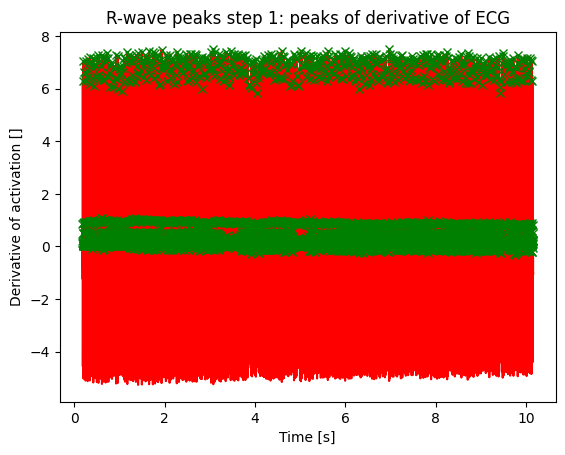

In [4]:
d_ecg, peaks_d_ecg = ekg.decg_peaks(ecg_filtered, time_ms)

### 1b)

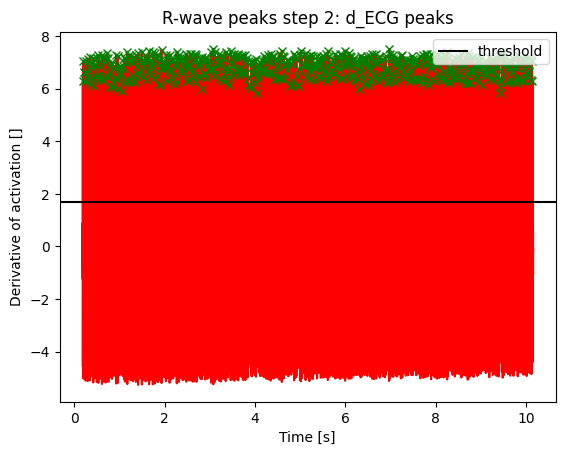

In [5]:
Rwave_peaks_d_ecg=ekg.d_ecg_peaks(d_ecg, peaks_d_ecg, time_ms, 0.4, 0.5)
#print(Rwave_peaks_d_ecg)    

### 1c)

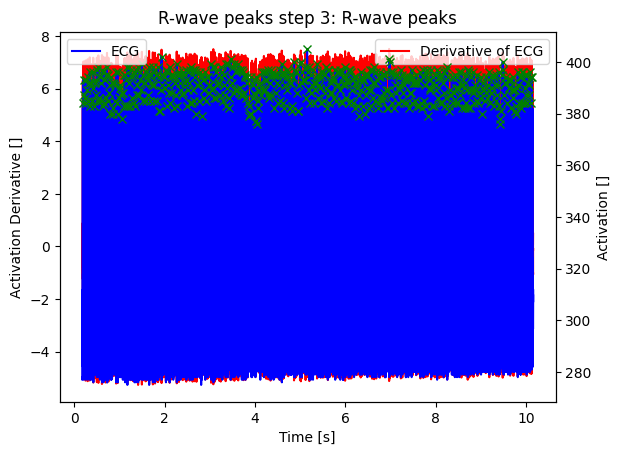

0       0.191533
1       0.206733
2       0.223183
3       0.237333
4       0.252200
         ...    
628    10.072583
629    10.088233
630    10.102183
631    10.116100
632    10.130417
Name: Millis, Length: 633, dtype: float64


In [6]:
Rwave_t = ekg.Rwave_peaks(ecg, d_ecg, Rwave_peaks_d_ecg, time_ms)
print(Rwave_t)

### 2.

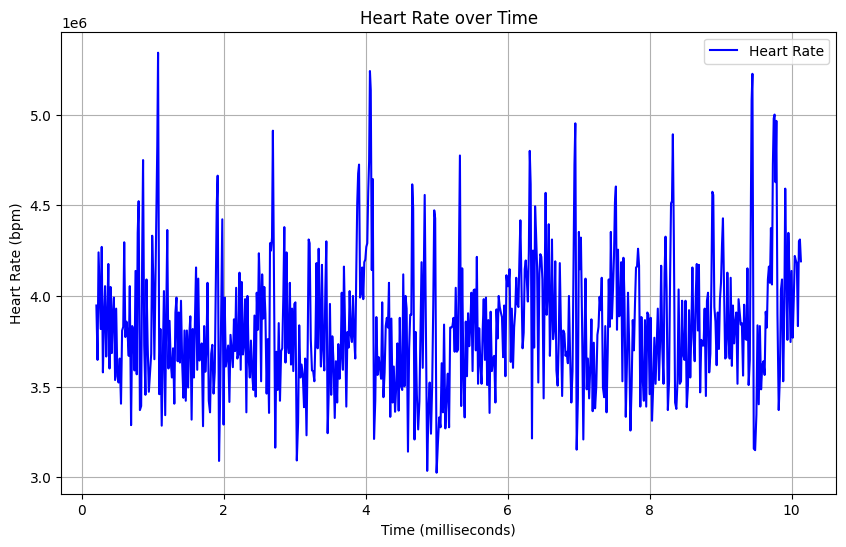

Heart Rate Variability (HRV): 373540.19961032964 bpm


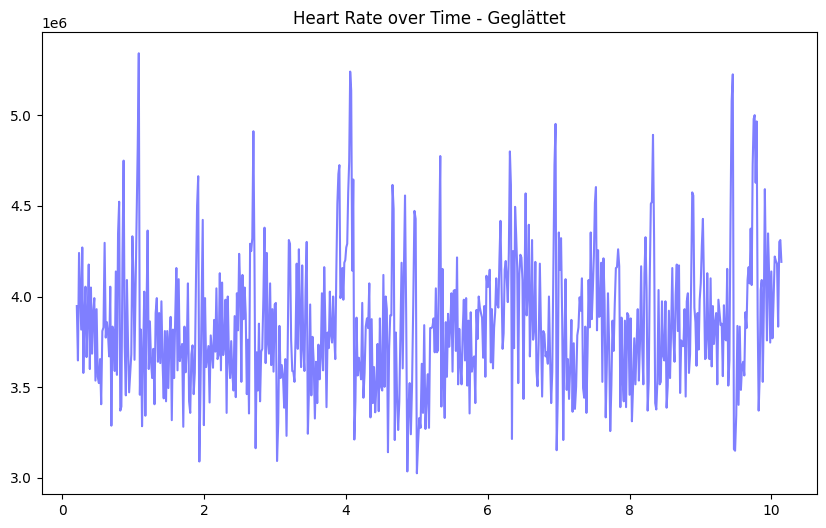

In [7]:
# Calculate the time differences between consecutive R-wave peaks
Rwave_intervals = np.diff(Rwave_t)

# Calculate the heart rate in beats per minute (bpm)
heart_rate = (60 / Rwave_intervals)*1000

# Create a new time series for the heart rate
exercise_hr = Rwave_t[1:]  # Exclude the first R-wave time as it has no preceding interval

# Plot the heart rate
plt.figure(figsize=(10, 6))
plt.plot(exercise_hr, heart_rate, label='Heart Rate', color='blue')
plt.title('Heart Rate over Time')
plt.xlabel('Time (milliseconds)')


plt.ylabel('Heart Rate (bpm)')
plt.legend()
plt.grid()
plt.show()

Wn=0.09
b2, a2=sci.butter(4, Wn, btype='low')
exercise_hr_filt=sci.filtfilt(b2, a2, exercise_hr)

plt.figure(figsize=(10, 6))
plt.plot(exercise_hr_filt, heart_rate, label='Heart Rate', color='blue', alpha=0.5)
plt.title('Heart Rate over Time - Geglättet')

# Calculate heart rate variability (HRV) as the standard deviation of the heart rate
hrv = np.std(heart_rate)
print(f'Heart Rate Variability (HRV): {hrv} bpm')



# Aufgaben Laborbericht
## Aufgabe 3 
### Führen Sie Aufgabe 1 Teil 4: Experiment in Ruhe für jeden Teilnehmer Ihrer Gruppe aus und plotten Sie etwas 5 Sekunden der gefilterten Daten. Markieren Sie für einen Teilnehmer die P-Welle, den QRS-Komplex unddie T-Welle im Plot. Beschreiben Sie das physiologische Phänomen, welches für die jeweiligen elektrischen Signale des EKGs verantwortlich ist. (1Darstellung mit allen Teilnehmern + Markierung der Wellen für eine Person, 1 Paragraph, 3 Punkte)

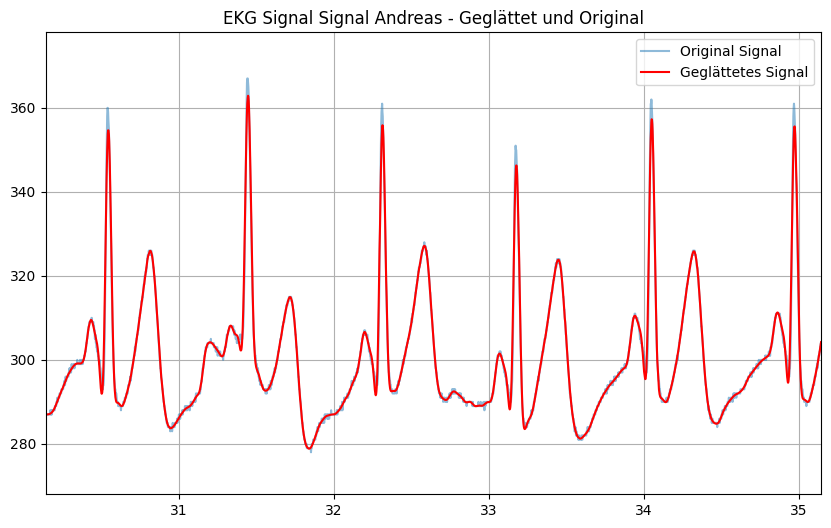

In [8]:
# Plot Ruhe Andreas
df1 = pd.read_csv('lab2code1_Ruhe_Andreas2.csv', sep = ';')
time_ms = df1['Millis']
ecg=df1['Value']

#Zeit in Sekunden und Minuten
time_sec = time_ms / 1000 
time_minutes = time_sec / 60

#Signal glätten
Wn=0.08
b, a = sci.butter(4, Wn, 'low', analog=False)
ecg_filtered = sci.filtfilt(b, a, ecg) 

# EKG plotten 
plt.figure(figsize=(10, 6))
plt.plot(time_sec, ecg, label='Original Signal', alpha=0.5)
plt.plot(time_sec, ecg_filtered, label='Geglättetes Signal', color='red')
plt.title('EKG Signal Signal Andreas - Geglättet und Original')
plt.legend()
plt.grid()

# nur 5 Sekunden vom Plot anzeigen
start_time = time_sec.iloc[0]
end_time = start_time + 5  

plt.xlim(start_time, end_time)
plt.show()



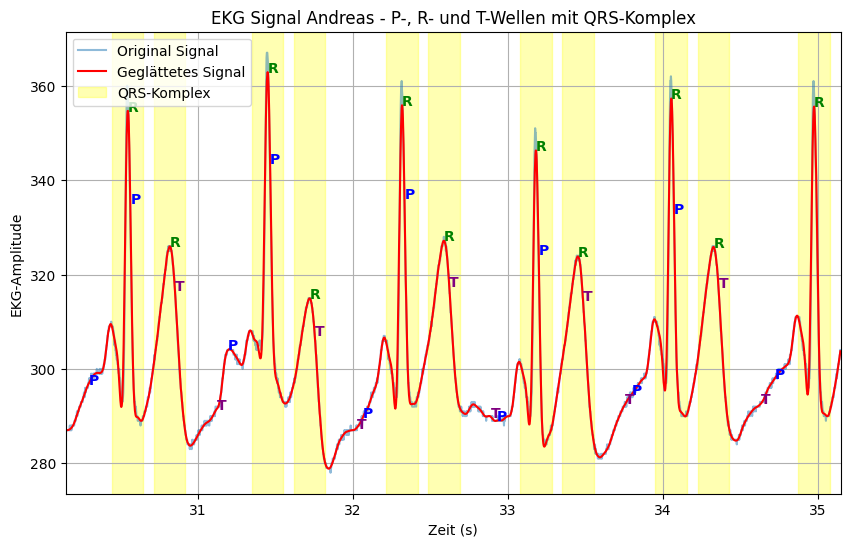

In [9]:
time_sec= time_ms / 1000
# Nur Daten für 5 Sekunden plotten
start_time = time_sec.iloc[0]
end_time = start_time + 5  
mask = (time_sec >= start_time) & (time_sec <= end_time)

# Gefilterte Daten beschränken
time_sec_plot = time_sec[mask]
ecg_filtered_plot = ecg_filtered[mask]
ecg_plot = ecg[mask]

# R-Spitzen erkennen (z. B. für QRS-Komplex)
distance = int(200 / (time_ms[1] - time_ms[0]))  # Mindestabstand (200ms in Samples)
r_peaks, _ = sci.find_peaks(ecg_filtered, distance=distance, height=np.mean(ecg_filtered) + np.std(ecg_filtered))

# QRS-Komplex: Q- und S-Punkte finden
qrs_windows = []
for peak in r_peaks:
    if start_time <= time_sec[peak] <= end_time:  # Nur Spitzen innerhalb des Plots
        window = int(100 / (time_ms[1] - time_ms[0]))  # 100ms vor und nach der R-Spitze
        q_idx = max(0, peak - window)
        s_idx = min(len(ecg_filtered) - 1, peak + window)
        qrs_windows.append((q_idx, s_idx))

# P- und T-Wellen schätzen
p_waves = [max(0, q - int(150 / (time_ms[1] - time_ms[0]))) for q, _ in qrs_windows]
t_waves = [min(len(ecg_filtered) - 1, s + int(200 / (time_ms[1] - time_ms[0]))) for _, s in qrs_windows]

# Plotten der EKG-Daten mit verbesserten Markierungen
plt.figure(figsize=(10, 6))
plt.plot(time_sec_plot, ecg_plot, label='Original Signal', alpha=0.5)
plt.plot(time_sec_plot, ecg_filtered_plot, label='Geglättetes Signal', color='red')

# QRS-Komplex als Rechtecke markieren
for q, s in qrs_windows:
    if start_time <= time_sec[q] <= end_time and start_time <= time_sec[s] <= end_time:
        plt.axvspan(time_sec[q], time_sec[s], color='yellow', alpha=0.3, label='QRS-Komplex')

# R-Spitzen als Buchstaben markieren
for r in r_peaks:
    if start_time <= time_sec[r] <= end_time:
        plt.text(time_sec[r], ecg_filtered[r], 'R', color='green', fontsize=10, fontweight='bold')

# P- und T-Wellen als Buchstaben markieren
for p in p_waves:
    if start_time <= time_sec[p] <= end_time:
        plt.text(time_sec[p], ecg_filtered[p], 'P', color='blue', fontsize=10, fontweight='bold')
for t in t_waves:
    if start_time <= time_sec[t] <= end_time:
        plt.text(time_sec[t], ecg_filtered[t], 'T', color='purple', fontsize=10, fontweight='bold')

# Legende anpassen (verhindert doppelte Labels)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

plt.title('EKG Signal Andreas - P-, R- und T-Wellen mit QRS-Komplex')
plt.xlabel('Zeit (s)')
plt.ylabel('EKG-Amplitude')
plt.grid()
plt.xlim(start_time, end_time)
plt.show()

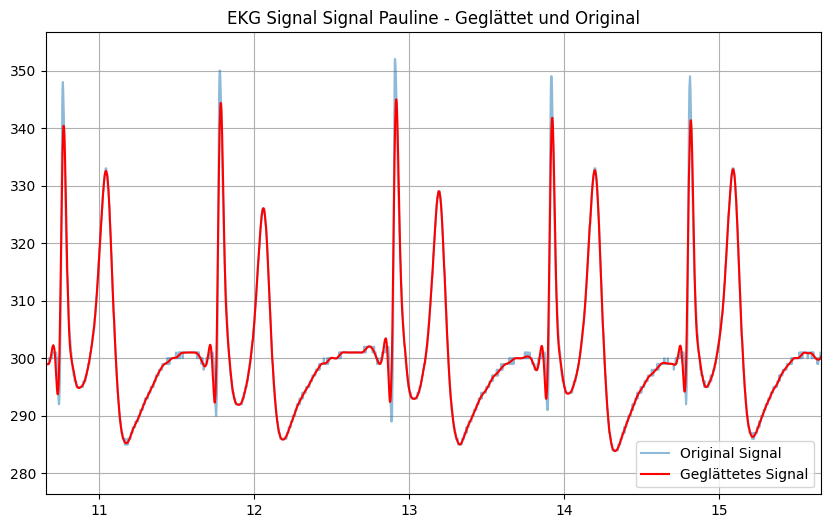

In [10]:
# Plot Ruhe Pauline
df2 = pd.read_csv('lab2code1_Ruhe_Pauline.csv', sep = ';')
time_ms = df2['Millis']
ecg=df2['Value']

#Zeit in Sekunden und Minuten
time_sec = time_ms / 1000 
time_minutes = time_sec / 60

#Signal glätten
Wn=0.08
b, a = sci.butter(4, Wn, 'low', analog=False)
ecg_filtered = sci.filtfilt(b, a, ecg) 

# EKG plotten 
plt.figure(figsize=(10, 6))
plt.plot(time_sec, ecg, label='Original Signal', alpha=0.5)
plt.plot(time_sec, ecg_filtered, label='Geglättetes Signal', color='red')
plt.title('EKG Signal Signal Pauline - Geglättet und Original')
plt.legend()
plt.grid()

# nur 5 Sekunden vom Plot anzeigen
start_time = time_sec.iloc[0]
end_time = start_time + 5  

plt.xlim(start_time, end_time)
plt.show()



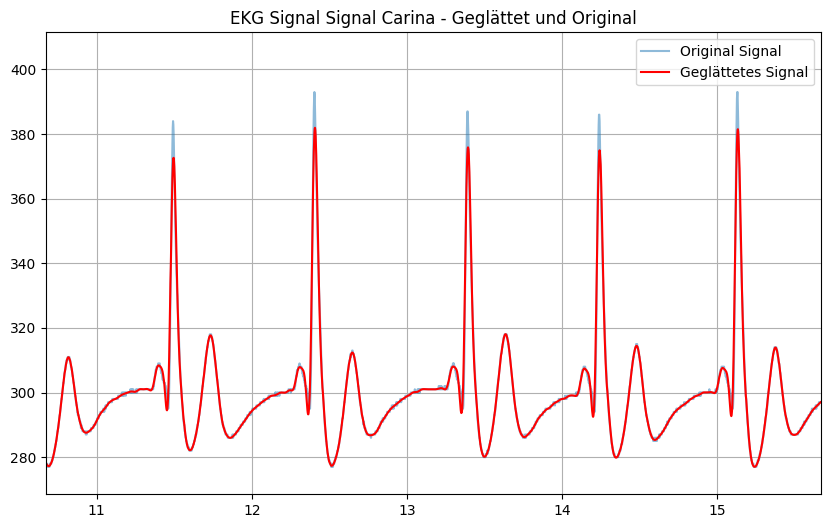

In [11]:
# Plot Ruhe Carina
df3 = pd.read_csv('lab2code1_Ruhe_Carina.csv', sep = ';')
time_ms = df3['Millis']
ecg=df3['Value']

#Zeit in Sekunden und Minuten
time_sec = time_ms / 1000 
time_minutes = time_sec / 60

#Signal glätten
Wn=0.08
b, a = sci.butter(4, Wn, 'low', analog=False)
ecg_filtered = sci.filtfilt(b, a, ecg) 

# EKG plotten 
plt.figure(figsize=(10, 6))
plt.plot(time_sec, ecg, label='Original Signal', alpha=0.5)
plt.plot(time_sec, ecg_filtered, label='Geglättetes Signal', color='red')
plt.title('EKG Signal Signal Carina - Geglättet und Original')
plt.legend()
plt.grid()

# nur 5 Sekunden vom Plot anzeigen
start_time = time_sec.iloc[0]
end_time = start_time + 5  

plt.xlim(start_time, end_time)
plt.show()



## Aufgabe 5
### Plotten Sie etwa 5 Sekunden des EKG-Signals vom Experiment in Ruhe von einem der Teilnehmer (gefiltert).Nutzen Sie die Ergebnisse der Peak Suche-Funktion, um die R-Zacken im Plot zu labeln. (1 Darstellung, 1Punkt)

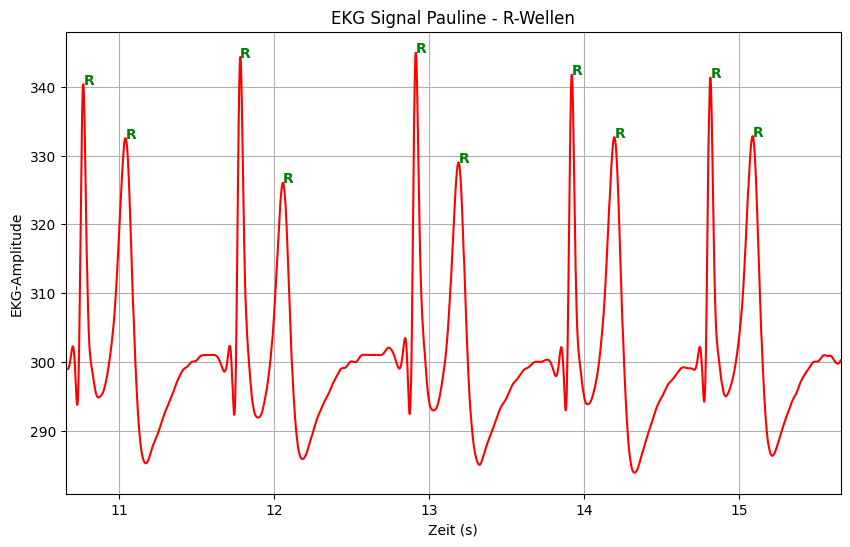

In [12]:
# Plot Ruhe Pauline
df2 = pd.read_csv('lab2code1_Ruhe_Pauline.csv', sep = ';')
time_ms = df2['Millis']
ecg=df2['Value']

#Zeit in Sekunden und Minuten
time_sec = time_ms / 1000 
time_minutes = time_sec / 60

#Signal glätten
Wn=0.08
b, a = sci.butter(4, Wn, 'low', analog=False)
ecg_filtered = sci.filtfilt(b, a, ecg)

time_sec= time_ms / 1000
# Nur Daten für 5 Sekunden plotten
start_time = time_sec.iloc[0]
end_time = start_time + 5  
mask = (time_sec >= start_time) & (time_sec <= end_time)

# Gefilterte Daten beschränken
time_sec_plot = time_sec[mask]
ecg_filtered_plot = ecg_filtered[mask]
ecg_plot = ecg[mask]

# R-Spitzen erkennen (z. B. für QRS-Komplex)
distance = int(200 / (time_ms[1] - time_ms[0]))  # Mindestabstand (200ms in Samples)
r_peaks, _ = sci.find_peaks(ecg_filtered, distance=distance, height=np.mean(ecg_filtered) + np.std(ecg_filtered))


# Plotten der EKG-Daten mit verbesserten Markierungen
plt.figure(figsize=(10, 6))
#plt.plot(time_sec_plot, ecg_plot, label='Original Signal', alpha=0.5)
plt.plot(time_sec_plot, ecg_filtered_plot, label='Geglättetes Signal', color='red')


# R-Spitzen als Buchstaben markieren
for r in r_peaks:
    if start_time <= time_sec[r] <= end_time:
        plt.text(time_sec[r], ecg_filtered[r], 'R', color='green', fontsize=10, fontweight='bold')


# Legende anpassen (verhindert doppelte Labels)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
#plt.legend(by_label.values(), by_label.keys())

plt.title('EKG Signal Pauline - R-Wellen')
plt.xlabel('Zeit (s)')
plt.ylabel('EKG-Amplitude')
plt.grid()
plt.xlim(start_time, end_time)
plt.show()

## Aufgabe 6
### Verwenden Sie Python, um die mittlere Herzfrequenz und HRV (mit derStandardabweichung) für jeden der drei Teilnehmer zu bestimmen. Vergleichen Sie die Ergebnisse in einer Tabelle (eine Zeile pro Teilnehmer). Denken Sie daran, alle Datensätze zu den jeweiligen Teilnehmern mit abzugeben. Die Berechnung soll im Code MainCode2 stattfinden. (1 Tabelle, wenige Sätze, 2 Punkte)

In [13]:
def analyze_ecg(file_path, person_name):
    # CSV-Datei einlesen
    df = pd.read_csv(file_path, sep=';')
    time_ms = df['Millis']
    ecg = df['Value']

    # Tiefpassfilter anwenden
    Wn = 0.08
    b, a = sci.butter(4, Wn, 'low', analog=False)
    ecg_filtered = sci.filtfilt(b, a, ecg)

    # R-Zacken erkennen
    peaks, _ = sci.find_peaks(ecg_filtered, distance=250)  # Mindestabstand der Peaks kann angepasst werden

    # RR-Intervalle berechnen (in Millisekunden)
    rr_intervals = np.diff(time_ms[peaks])  # in Millisekunden

    # Mittlere Herzfrequenz berechnen (in bpm)
    average_hr = 60000 / np.mean(rr_intervals)  # Umrechnung von ms zu bpm

    # HRV berechnen (Standardabweichung der RR-Intervalle)
    hrv = np.std(rr_intervals)  # in Millisekunden

    print(f"\nAnalyse für {person_name}:")
    print(f"Mittlere Herzfrequenz: {average_hr:.2f} bpm")
    print(f"HRV (Standardabweichung der RR-Intervalle): {hrv:.2f} ms")


# Analyse für Carina
analyze_ecg('lab2code1_Ruhe_Carina.csv', 'Carina')

# Analyse für Pauline
analyze_ecg('lab2code1_Ruhe_Pauline.csv', 'Pauline')

# Analyse für Andreas
analyze_ecg('lab2code1_Ruhe_Andreas2.csv', 'Andreas')



Analyse für Carina:
Mittlere Herzfrequenz: 63.64 bpm
HRV (Standardabweichung der RR-Intervalle): 88.55 ms

Analyse für Pauline:
Mittlere Herzfrequenz: 62.04 bpm
HRV (Standardabweichung der RR-Intervalle): 88.96 ms

Analyse für Andreas:
Mittlere Herzfrequenz: 60.19 bpm
HRV (Standardabweichung der RR-Intervalle): 70.31 ms


## Aufgabe 8
### Lassen Sie einen Ihrer Gruppenteilnehmer das Experiment in Bewegung machen, welches in Aufgabe 1 Teil 5 beschrieben ist. Stellen Sie die gefilterte Herzfrequenz über die gesamte Zeit dar. (1 Darstellung, 1 Punkt)

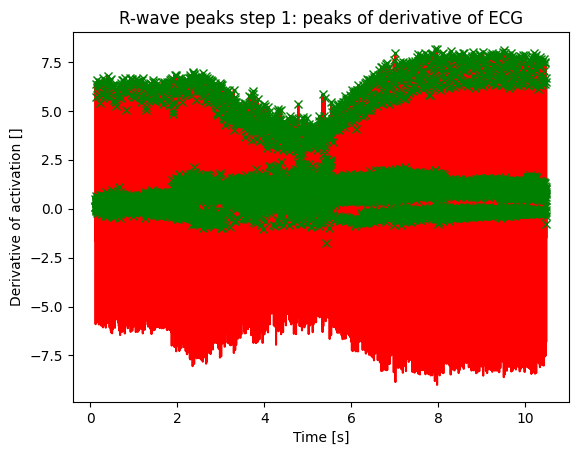

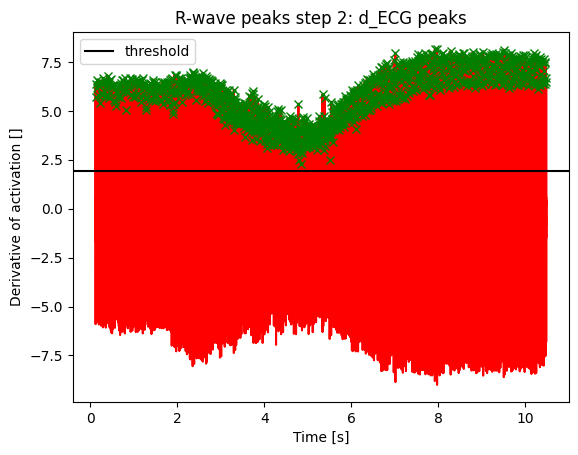

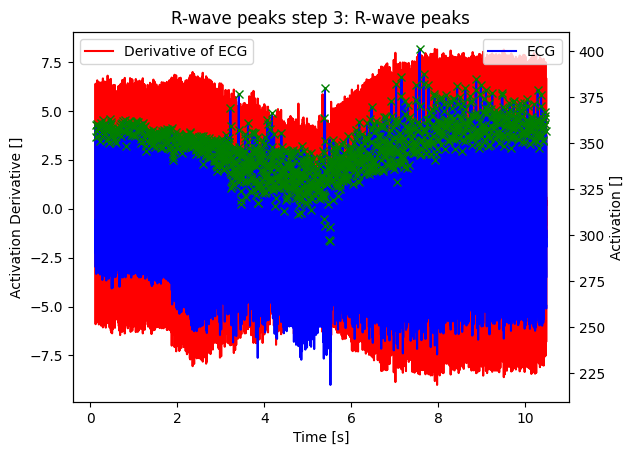

<function matplotlib.pyplot.show(close=None, block=None)>

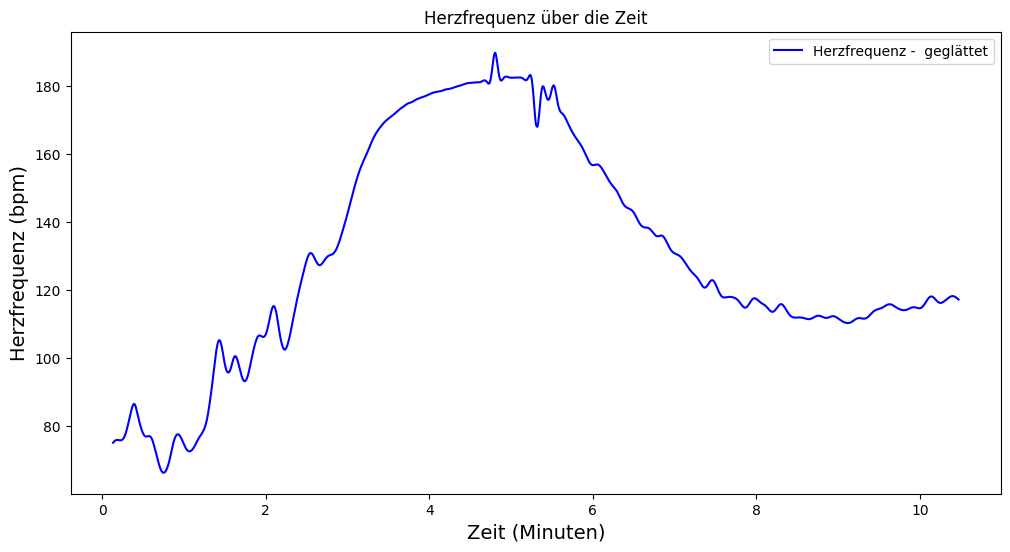

In [14]:
from Lab2Functions import Rwave_peaks


df4 = pd.read_csv('lab2code1_Fahrrad_Andreas.csv', sep=';')
time_ms = df4['Millis']  # Zeit in Millisekunden
ecg = df4['Value'] 

time_sec = time_ms / 1000 #Zeit in Sekunden
time_minutes = time_sec/60 # Zeit in Minuten

Wn=0.09
b,a =sci.butter(4, Wn, 'low', analog=False)
ecg_filtered = sci.filtfilt(b, a, ecg)

d_ecg, peaks_d_ecg = ekg.decg_peaks(ecg_filtered, time_minutes)
Rwave_peaks_d_ecg=ekg.d_ecg_peaks(d_ecg, peaks_d_ecg, time_minutes, 0.4, 0.5)
Rwave_t=Rwave_peaks(ecg_filtered, d_ecg, Rwave_peaks_d_ecg, time_minutes)

Rwave_intervals = np.diff(Rwave_t)
heart_rate = (1 / Rwave_intervals)

#heart rate nochmal filtern
Wn=0.1
b2, a2 =sci.butter(4, Wn, btype='low')
heart_rate_filt=sci.filtfilt(b2, a2, heart_rate)
heart_rate_time=Rwave_t[1:]

#plot heart rate
plt.figure(figsize=(12, 6))
plt.plot(heart_rate_time, heart_rate_filt, label='Herzfrequenz -  geglättet', color='blue')
plt.legend()
plt.title('Herzfrequenz über die Zeit') 
plt.xlabel('Zeit (Minuten)', fontsize=14)
plt.ylabel('Herzfrequenz (bpm)', fontsize=14)
plt.show



### Aufgabe 9

#### a)

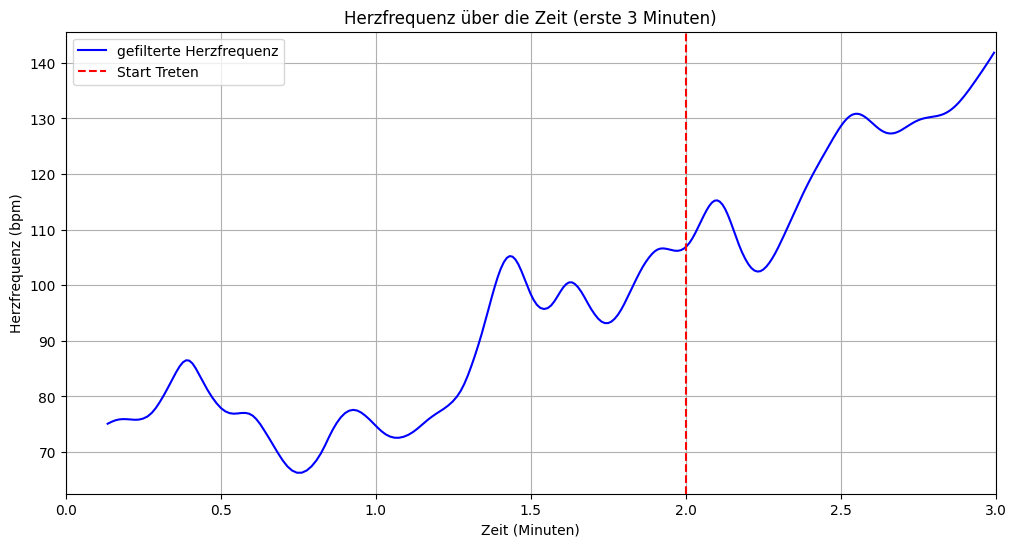

In [15]:
# Daten auf die ersten 3 Minuten begrenzen
max_time = 3  # maximale Zeit in Minuten
mask = heart_rate_time <= max_time
heart_rate_time_limited = heart_rate_time[mask]
heart_rate_filt_limited = heart_rate_filt[mask]

# Herzfrequenz nur für die ersten 3 Minuten
plt.figure(figsize=(12, 6))
plt.plot(heart_rate_time_limited, heart_rate_filt_limited, label='gefilterte Herzfrequenz', color='b')

# Markierung bei 2 Minuten
plt.axvline(x=2, color='r', linestyle='--', label='Start Treten')

plt.title('Herzfrequenz über die Zeit (erste 3 Minuten)')
plt.xlabel('Zeit (Minuten)')
plt.ylabel('Herzfrequenz (bpm)')
plt.legend()
plt.grid()
plt.xlim([0, max_time])  
plt.show()


#Chatgpt zu b und c
Um die Aufgabenstellung zu erfüllen, können wir den Code weiter anpassen und Details zur Visualisierung und Analyse hinzufügen. Hier ist eine fokussierte Vorgehensweise für die Aufgaben:

### Code-Anpassungen für (a)
1. **Datendarstellung der ersten 3 Minuten**: Wir beschränken die Daten auf die ersten 3 Minuten.
2. **Markierung des Zeitpunkts des Beginns der Übung**: Ein vertikaler Strich oder eine Annotation zeigt den Zeitpunkt an, an dem die Übung beginnt.

Hier ist der Code mit den entsprechenden Anpassungen:

### Erklärung für (b)
Die Dynamik des Herzfrequenzanstiegs zeigt sich, weil der Körper Zeit benötigt, um auf die erhöhte Aktivität zu reagieren. Die Verzögerung zwischen dem Start der Übung und dem Anstieg der Herzfrequenz liegt in der Steuerung des Kreislaufsystems durch das autonome Nervensystem. Der Körper erkennt eine Belastung und leitet einen Anstieg der Herzfrequenz ein, um den erhöhten Sauerstoffbedarf zu decken.

### Erklärung für (c)
**Cardiac Output (Herzzeitvolumen)** beschreibt das Volumen des Blutes, das das Herz pro Minute pumpt. Eine plötzliche Aktivierung der Muskulatur führt nicht sofort zu einer Änderung des Cardiac Outputs, da es Zeit benötigt, bis das Herz auf den erhöhten Sauerstoffbedarf reagiert. Der initiale Anstieg ist durch neuromuskuläre und hormonelle Signale vermittelt, die eine verzögerte Reaktion des Herz-Kreislauf-Systems zur Folge haben.

# Aufgabe 10

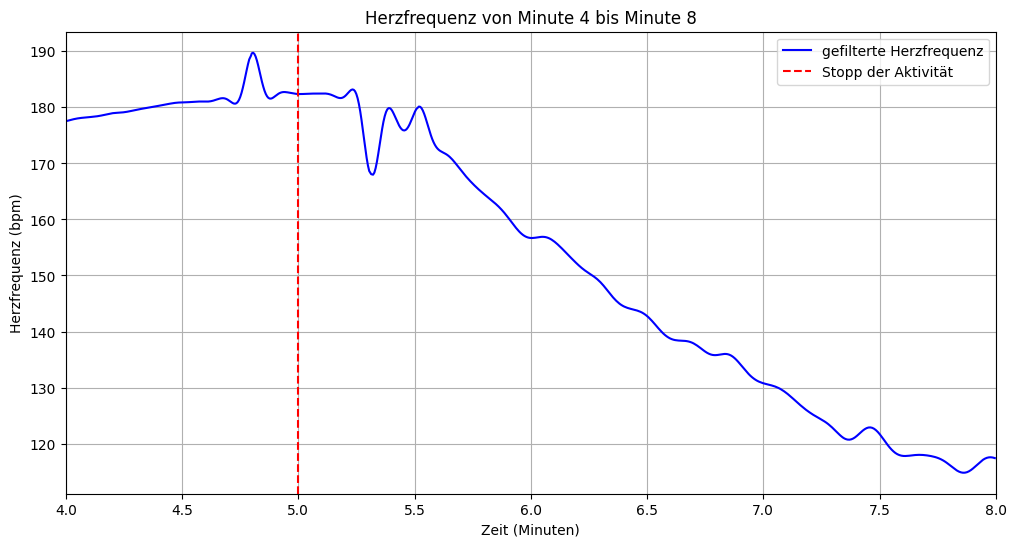

In [16]:
start_time = 4  # Startzeit in Minuten
end_time = 8  # Endzeit in Minuten
mask = (heart_rate_time >= start_time) & (heart_rate_time <= end_time)
heart_rate_time_segment = heart_rate_time[mask]
heart_rate_filt_segment = heart_rate_filt[mask]

# Plot der Herzfrequenz (4 bis 8 Minuten)
plt.figure(figsize=(12, 6))
plt.plot(heart_rate_time_segment, heart_rate_filt_segment, label='gefilterte Herzfrequenz', color='b')

# Markierung bei Minute 5
plt.axvline(x=5, color='r', linestyle='--', label='Stopp der Aktivität')

plt.title('Herzfrequenz von Minute 4 bis Minute 8')
plt.xlabel('Zeit (Minuten)')
plt.ylabel('Herzfrequenz (bpm)')
plt.legend()
plt.grid()
plt.xlim([start_time, end_time])  # Begrenzung auf 4 bis 8 Minuten
plt.show()

b)

In [27]:
# Schritt 1: Ab der fünften Minute die Herzfrequenz extrahieren
time_threshold = 5  # in Minuten
after_five_minutes = heart_rate_time >= time_threshold
heart_rate_after_five = heart_rate_filt[after_five_minutes]
time_after_five = heart_rate_time[after_five_minutes]

# Schritt 2: Niedrigste Herzfrequenz finden
min_heart_rate = np.min(heart_rate_after_five)
min_heart_rate_time = time_after_five.iloc[np.argmin(heart_rate_after_five)]

# Ausgabe des niedrigsten Herzfrequenzwerts und der Zeit, bis er nach 5 Minuten erreicht wird
print(f"Niedrigste Herzfrequenz nach 5 Minuten: {min_heart_rate:.2f} bpm")
print(f"Zeit nach 5 Minuten, bis die niedrigste Herzfrequenz erreicht wird: {min_heart_rate_time - time_threshold:.2f} Minuten")

Niedrigste Herzfrequenz nach 5 Minuten: 110.26 bpm
Zeit nach 5 Minuten, bis die niedrigste Herzfrequenz erreicht wird: 4.12 Minuten


## Aufgabe 12


Gesamter Energieverbrauch: 142.28 kcal


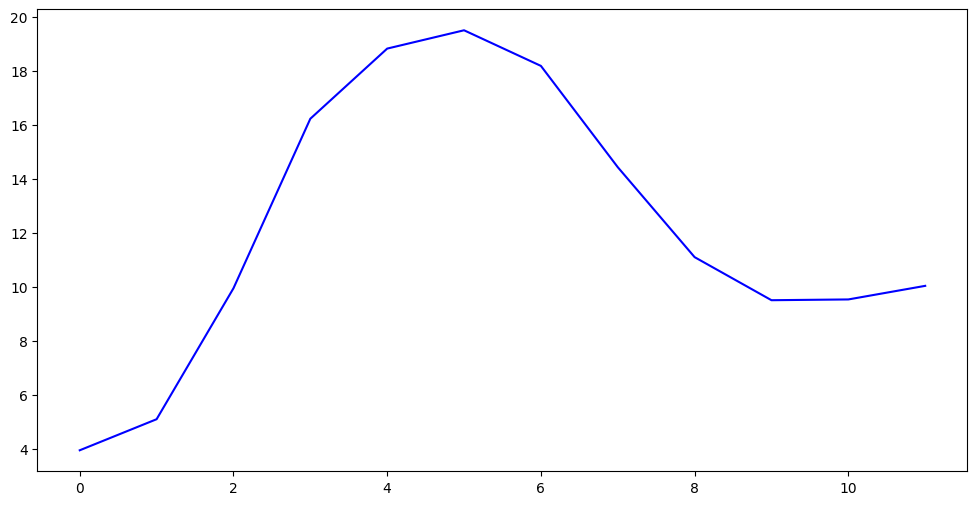

In [36]:
heartrate_ges = []
for i in range(0,len(heart_rate_filt),131):
    hr_min = np.mean(heart_rate_filt[i:(i+131)])
    heartrate_ges.append(float(hr_min))

#print(herzrate_ges)

energy_ges = [3.94,]
Gewicht=67
Körpergröße=188
Ruhepuls = 60.19
alter = 25
hf_max = 206-(alter*0.88)

for hr_avg in heartrate_ges:
    HRR = 100*(hr_avg-Ruhepuls)/(hf_max-alter-Ruhepuls)
    energieverbrauch = (1.004+0.0250*HRR+0.01088*Gewicht+0.00177*Gewicht*HRR)
    energy_ges.append(energieverbrauch)
zeit = list(range(0,len(energy_ges)))

plt.figure(figsize=(12, 6))
plt.plot(zeit, energy_ges, label='Energieverbrauch', color='b')

# gesamter Energieverbrauch
gesamt_energieverbrauch = np.sum(energy_ges[1:])  # Ohne den ersten Wert (Initialwert)
print(f"Gesamter Energieverbrauch: {gesamt_energieverbrauch:.2f} kcal")